In [1]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

# Reading in Images

In [2]:
cat_files = glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')
dog_files = glob('../input/cat-and-dog/training_set/training_set/dogs/*.jpg')

In [3]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((232, 350, 3), (232, 350, 3))

## Image Array
(Height, Width, Channels)

<img src="https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png" alt="imgpixels" style="height: 200px; width:600px;"/>

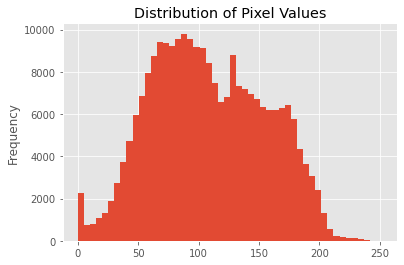

In [4]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

# Display Images

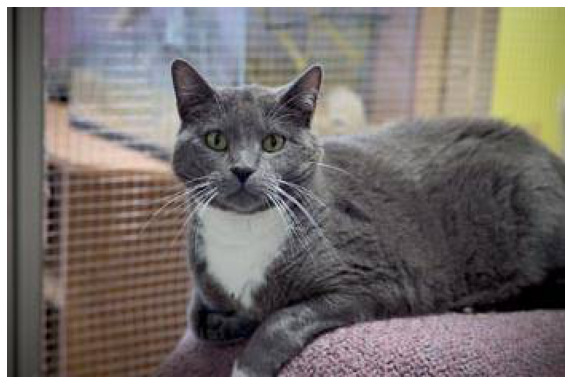

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

# Image Channels

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg" alt="Result3" style="width:300px;"/>

## RGB Channels

An RGB image has three channels: red, green, and blue. RGB channels roughly follow the color receptors in the human eye, and are used in computer displays and image scanners.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Channel_(digital_image)#:~:text=RGB%20images,-An%20RGB%20image&text=If%20the%20RGB%20image%20is,intensities%20between%200%20and%20255.)

<img src="https://i.imgur.com/g0R7AD3.png" alt="Result3" style="height: 300px; width:300px;"/>


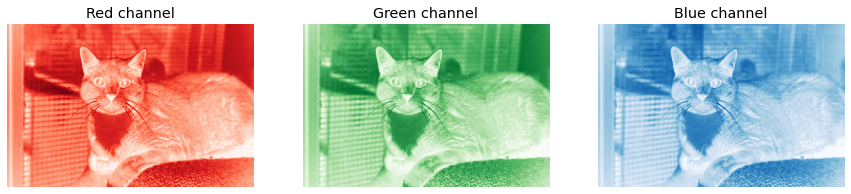

In [6]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

# Matplotlib vs cv2 Numpy Arrays
- cv2 reads in channels as BGR
- matplotlib reads in channels as RGB


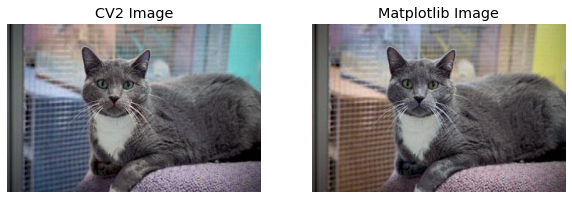

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

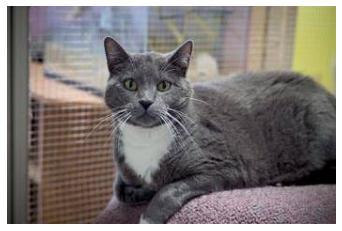

In [8]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

# Image Manipulation

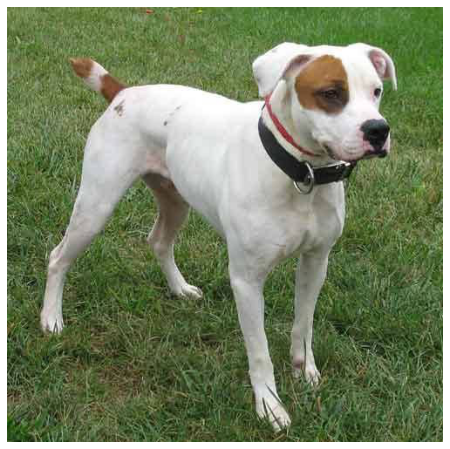

In [9]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

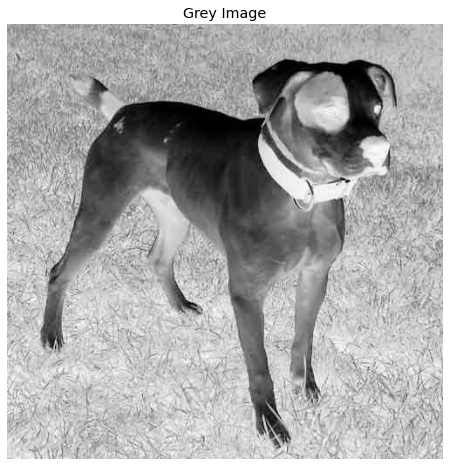

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

# Resizing and Scaling

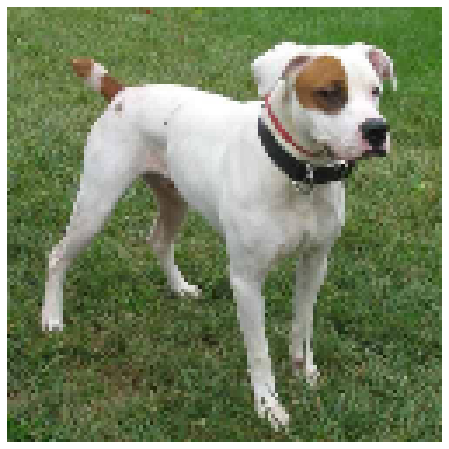

In [11]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

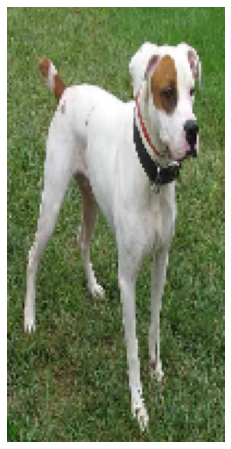

In [12]:
# Different Size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

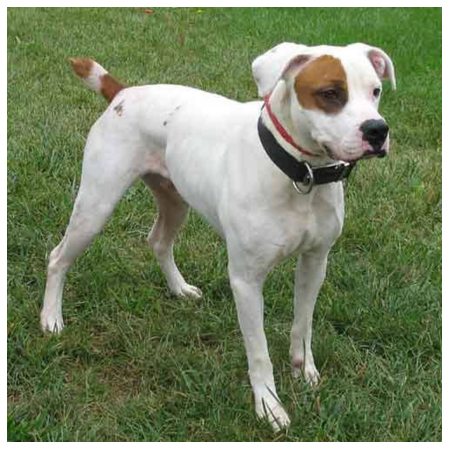

In [13]:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

# CV2 Kernels
<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels" style="width:400px;"/>

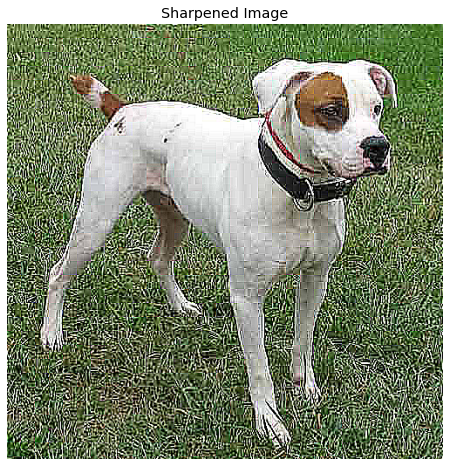

In [14]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

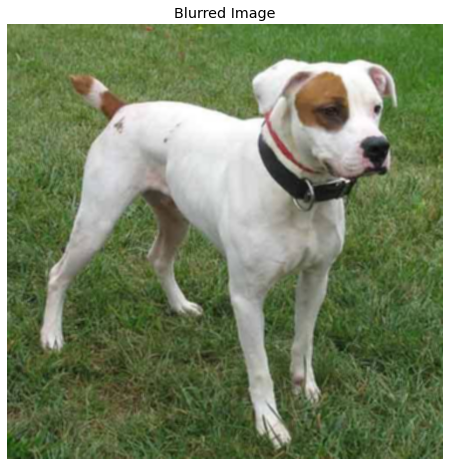

In [15]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

# Save Image

In [16]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True

# The End